## Heroes of Pymoli
(http://localhost:8888/edit/Pandas%20Homework/Heroes%20of%20Pymoli/Heroes%20of%20Pymoli%3A%20Final%20Analysis)
_ _ [Heroes of Pymoli Written Analysis] (

<img src="http://localhost:8888/files/UTAUS201810DATA2/04_Pandas/Homework/Instructions/Images/Fantasy.jpg"/>

## Heroes of Pymoli
[Heroes of Pymoli Written Analysis]
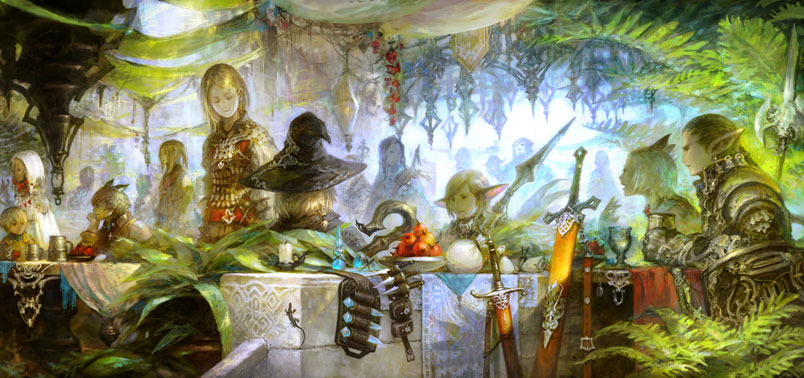

In [10]:
# Dependencies
import pandas as pd
import numpy as np
import os

# CSV File
csv_path = "Resources/purchase_data.csv"

# Read CSV into DF
data_file = pd.read_csv(csv_path)
data_file

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
5,5,Yalae81,22,Male,81,Dreamkiss,3.61
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18
7,7,Iskjaskst81,20,Male,162,Abyssal Shard,2.67
8,8,Undjask33,22,Male,21,Souleater,1.10
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58


### Player Count: 
* Display the total number of Players

In [2]:
Player_Totals = data_file.loc[:,["Gender", "SN", "Age"]]
Player_Totals = Player_Totals.drop_duplicates()
Number_of_Players = Player_Totals.count()[0]

pd.DataFrame({"Total Players" : [Number_of_Players]})

,Total Players
0,576


### Purchasing Analysis (Total)
* Number of Unique Items
* Average Purchase Price
* Total Number of Purchases
* Total Revenue

In [5]:
Number_of_Unique_Items = data_file['Item ID'].nunique()
Average_Price = data_file['Price'].mean().round(2)
Number_of_Purchases = data_file['Purchase ID'].count()
Total_Revenue = data_file['Price'].sum().round(2)

# Purchasing Analysis DataFrame

Total_Purchasing_AnalysisDF = pd.DataFrame({
    "Number of Unique Items":[Number_of_Unique_Items],
    "Average Purchase Price":[Average_Price],
    "Total Number of Purchases":[Number_of_Purchases],
    "Total Revenue":[Total_Revenue]})

# Currency/Formatting Added
Total_Purchasing_AnalysisDF["Average Purchase Price"] = Total_Purchasing_AnalysisDF["Average Purchase Price"].map("${:.2f}".format)
Total_Purchasing_AnalysisDF["Total Revenue"] = Total_Purchasing_AnalysisDF["Total Revenue"].map("${:.2f}".format)
Total_Purchasing_AnalysisDF

,Number of Unique Items,Average Purchase Price,Total Number of Purchases,Total Revenue
0,183,$3.05,780,$2379.77


### Gender Demographics
* Percentage & Count of Male Players
* Percentage and Count of Female Players
* Percentage and Count of Other / Non Disclosed

In [9]:
Gender_Totals = Player_Totals["Gender"].value_counts()
Gender_Percents = Gender_Totals/Number_of_Players*100

# Gender Demographics DataFrame
Gender_DemographicsDF = pd.DataFrame({"Total Count": Gender_Totals, "Percentage of Players": Gender_Percents})

# Currency/Formatting Added
Gender_DemographicsDF = Gender_DemographicsDF.round(2)
Gender_DemographicsDF

,Total Count,Percentage of Players
Male,484,84.03
Female,81,14.06
Other / Non-Disclosed,11,1.91


### Purchasing Analysis (Gender)
###### The below each broken by gender:
* Purchase Count 
* Average Purchase Price
* Total Purchase Value
* Average Purchase Total per Person by Gender

In [18]:
Gender_Purchase_Count = data_file.groupby(["Gender"])["Price"].count().rename("Purchase Count")
Average_Gender_Purchase_Price = data_file.groupby(["Gender"])["Price"].mean().rename("Average Purchase Price")
Total_Gender_Purchase_Value = data_file.groupby(["Gender"])["Price"].sum().rename("Total Purchase Value")
Average_Purchase_Total_PG = Total_Gender_Purchase_Value / Gender_DemographicsDF["Total Count"]


# Purchasing Analysis (Gender) DataFrame
Gender_Purchasing_AnalysisDF = pd.DataFrame({"Purchase Count": Gender_Purchase_Count,
                                            "Average Purchase Price": Average_Gender_Purchase_Price,
                                            "Total Purchase Value": Total_Gender_Purchase_Value,
                                            "Avg Total Purchase Per Person": Average_Purchase_Total_PG})
# Currency/Formatting Added
Gender_Purchasing_AnalysisDF["Average Purchase Price"] = Gender_Purchasing_AnalysisDF["Average Purchase Price"].map("${:.2f}".format) 
Gender_Purchasing_AnalysisDF["Total Purchase Value"] = Gender_Purchasing_AnalysisDF["Total Purchase Value"].map("${:.2f}".format)
Gender_Purchasing_AnalysisDF["Avg Total Purchase Per Person"] = Gender_Purchasing_AnalysisDF["Avg Total Purchase Per Person"].map("${:.2f}".format)
Gender_Purchasing_AnalysisDF = Gender_Purchasing_AnalysisDF.loc[:, ["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Avg Total Purchase Per Person"]]
Gender_Purchasing_AnalysisDF

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase Per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,$1967.64,$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


### Age Demographics
###### The below each broken into bins of 4 years:
* Purchase Count
* Average Purchase Price
* Total Purchase Value
* Average Purchase Total per Person by Age Group


In [12]:
# Establish the bins
bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
bin_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

Player_Totals["Age Ranges"] = pd.cut(Player_Totals["Age"], bins, labels = bin_labels)
Age_Demographics_Totals = Player_Totals["Age Ranges"].value_counts()
Age_Demographics_Percents = Age_Demographics_Totals / Number_of_Players * 100

# Age Demographics Data Frame
Age_DemographicsDF = pd.DataFrame({"Total Count": Age_Demographics_Totals, "Percentage of Players": Age_Demographics_Percents})

# Currency/Formatting Added
Age_DemographicsDF = Age_DemographicsDF.round(2)
Age_DemographicsDF.sort_index()

,Total Count,Percentage of Players
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


### Top Spenders
###### Identify top 5 spenders in the game by total purchase value, then list (in a table):
* SN
* Purchase Count
* Average Purchase Price
* Total Purchase Value

In [14]:
Spender_Analysis = data_file.groupby("SN")

Top_Purchase_Count = Spender_Analysis["Purchase ID"].count().round(2)
Avg_Spender_Price = Spender_Analysis["Price"].mean().round(2)
Total_Spender_Purchase = Spender_Analysis["Price"].sum().round(2)

# Top Spenders Data Frame 
Top_Spenders_Analysis = pd.DataFrame({"Purchase Count": Top_Purchase_Count,
                               "Average Purchase Price" : Avg_Spender_Price,
                                "Total Purchase Value": Total_Spender_Purchase
})

# Currency/Formatting Added                                 
Top_5_Spenders_DataFrame = Top_Spenders_Analysis.sort_values(["Total Purchase Value"], ascending=False).head(5) 
Top_5_Spenders_DataFrame["Average Purchase Price"] = Top_5_Spenders_DataFrame["Average Purchase Price"].map("${:.2f}".format)
Top_5_Spenders_DataFrame["Total Purchase Value"] = Top_5_Spenders_DataFrame["Total Purchase Value"].map("${:.2f}".format)
Top_5_Spenders_DataFrame

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


### Most Popular Items
###### Identify the 5 most popular items by purchase count, then list (in a table): 
* Item ID
* Item Name
* Purchase Count
* Item Price
* Total Purchase Value

In [19]:
Most_Popular_Group = data_file.groupby(["Item ID", "Item Name"])
Popular_Purchase_Count = Most_Popular_Group["Price"].count()
Popular_Purchase_Value = Most_Popular_Group["Price"].sum()
Popular_Item_Price = Popular_Purchase_Value/Popular_Purchase_Count

# Most Popular Items DataFrame

Most_Popular_Items = pd.DataFrame({"Purchase Count" : Popular_Purchase_Count,
                                  "Item Price": Popular_Item_Price,
                                  "Total Purchase Value": Popular_Purchase_Value})

Most_Popular_Items = Most_Popular_Items.sort_values("Purchase Count", ascending=False)

# Currency/Formatting Added                                  
Most_Popular_Items["Item Price"] = Most_Popular_Items["Item Price"].map("${:,.2f}".format)
Most_Popular_Items["Total Purchase Value"] = Most_Popular_Items["Total Purchase Value"].map("${:,.2f}".format)
Most_Popular_Items.head(5)

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


### Most Profitable Items
###### Identify the 5 most profitable items by total purchase value, then list (in a table):
* Item ID
* Item Name
* Purchase Count
* Item Price
* Total Purchase Value

In [17]:
Most_Profitable_Items = Most_Popular_Items.sort_values("Total Purchase Value", ascending=False)
Most_Profitable_Items = Most_Popular_Items.loc[:,["Purchase Count", "Item Price", "Total Purchase Value"]]

Most_Profitable_Items.head(5)

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


#### I was unsure if we actually needed to do the following section..
###### I began working on this homework using the provided Heros of Pymoli starter code and did not realize until after completing everything and comparing my formatting with the instructions/starter file, that the Purchasing Analysis by Age was not actually included in the homework instructions. I went ahead and kept it  within this notebook but added it at the end in order to keep the formatting for this homework identical to the instructions provided.

### Purchasing Analysis (Age)
* Bin the purchase_data data frame by age
* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below
* Create a summary data frame to hold the results
* Optional: give the displayed data cleaner formatting
* Display the summary data frame

In [21]:
#Purchasing Analysis (Age)
# Establish the bins
bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
bin_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]


data_file["Age Ranges"] = pd.cut(data_file["Age"], bins, labels= bin_labels)

Age_Purchase_Counts = data_file.groupby(["Age Ranges"])["Price"].count()
Age_Average_Price = data_file.groupby(["Age Ranges"])["Price"].mean().round(2)
Age_Purchase_Value = data_file.groupby(["Age Ranges"])["Price"].sum().round(2)
Average_Purchase_Total_Per_Person = Age_Purchase_Value / Age_DemographicsDF["Total Count"].round(2)

# Purchasing Analysis (Age) DataFrame
Age_Purchasing_Analysis = pd.DataFrame({"Purchase Count": Age_Purchase_Counts,
                                            "Average Purchase Price": Age_Average_Price,
                                            "Total Purchase Value": Age_Purchase_Value,
                                            "Avg Total Purchase Per Person": Average_Purchase_Total_Per_Person})

# Currency/Formatting Added
Age_Purchasing_Analysis["Purchase Count"] = Age_Purchasing_Analysis["Purchase Count"].map("{:,}".format)
Age_Purchasing_Analysis["Average Purchase Price"] = Age_Purchasing_Analysis["Average Purchase Price"].map("${:,.2f}".format)
Age_Purchasing_Analysis["Total Purchase Value"] = Age_Purchasing_Analysis["Total Purchase Value"].map("${:,.2f}".format)
Age_Purchasing_Analysis["Avg Total Purchase Per Person"] = Age_Purchasing_Analysis["Avg Total Purchase Per Person"].map("${:,.2f}".format)

Age_Purchasing_Analysis

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase Per Person
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19
<10,23,$3.35,$77.13,$4.54
